In [1]:
import scanpy as sc
import scFates as scf

In [2]:
sc.set_figure_params()
adata=sc.read("adata_preprocess.h5ad")

In [3]:
scf.tl.tree(adata,Nodes=500,use_rep="X_diffusion_multiscale",method="ppt",device="gpu",seed=1,
            ppt_sigma=.01,ppt_lambda=2000,ppt_nsteps=100)

inferring a principal tree inferring a principal tree --> parameters used 
    500 principal points, sigma = 0.01, lambda = 2000, metric = euclidean
    fitting:  25%|██▌       | 25/100 [00:09<00:29,  2.55it/s]
    converged
    finished (0:00:14) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


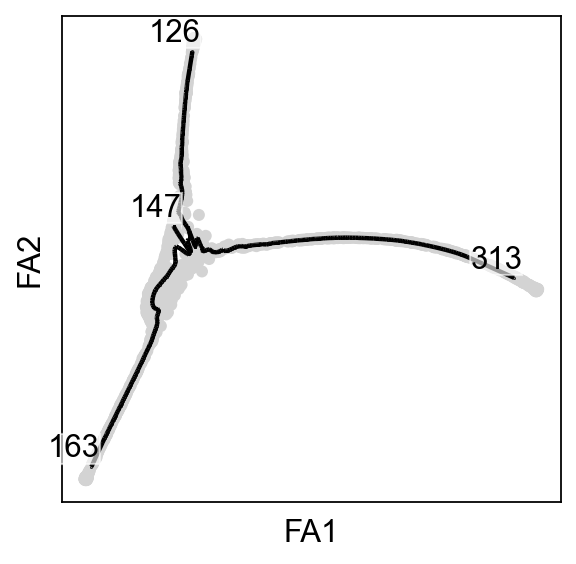

    graph cleaned --> removed 14 principal points


In [5]:
scf.pl.graph(adata,basis="draw_graph_fa",size_nodes=0.1,forks=False)
scf.tl.cleanup(adata,leaves=[147])

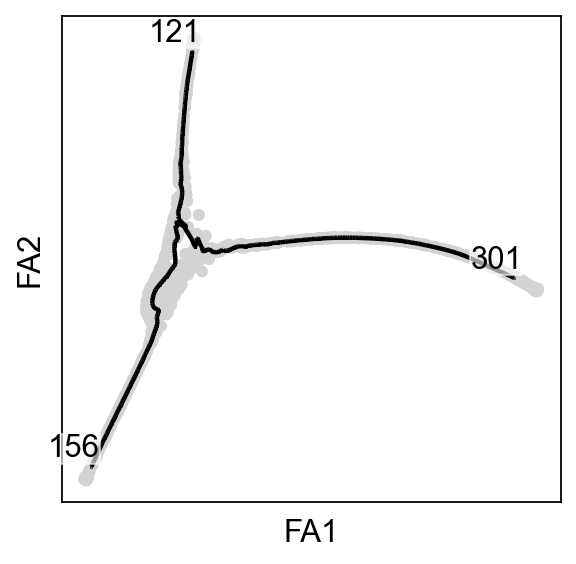

In [6]:
scf.pl.graph(adata,basis="draw_graph_fa",size_nodes=0.1,forks=False)

In [7]:
scf.tl.root(adata,121)

node 121 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [8]:
scf.tl.pseudotime(adata,n_jobs=80,n_map=100)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:39<00:00,  2.53it/s]
    finished (0:00:40) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [9]:
adata=adata.raw.to_adata()

In [10]:
sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata,base=10)

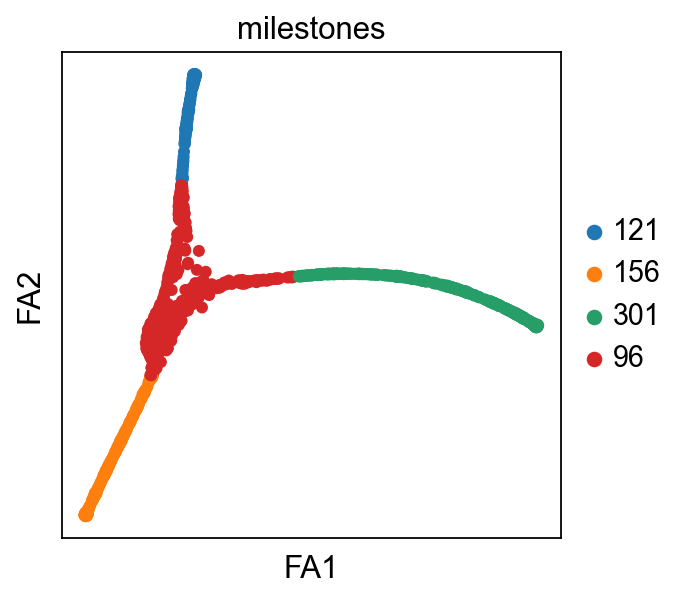

In [11]:
sc.pl.draw_graph(adata,color=["milestones"])

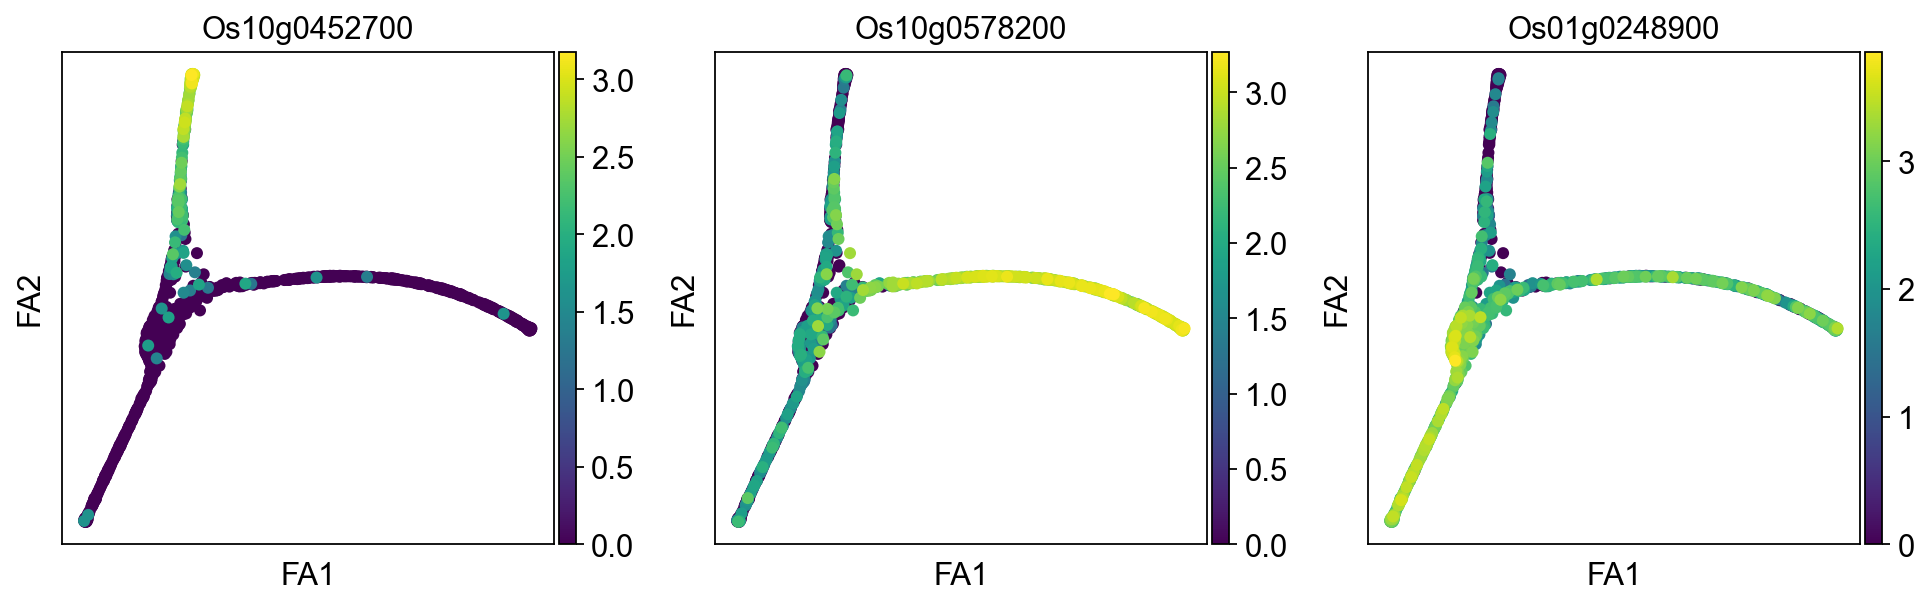

In [12]:
sc.pl.draw_graph(adata,color=["Os10g0452700","Os10g0578200","Os01g0248900"])

In [13]:
scf.tl.rename_milestones(adata,["Progenitors","atrichoblast","trichoblast","bifurcation"])

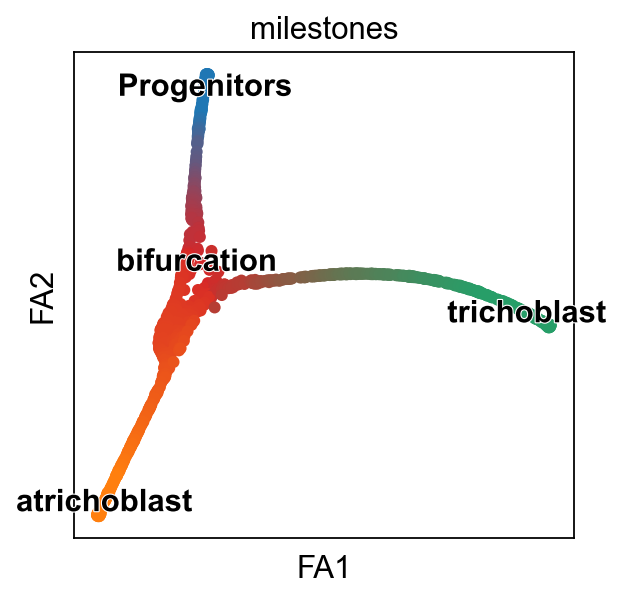

In [14]:
scf.pl.milestones(adata,annotate=True)

In [15]:
scf.tl.test_association(adata,n_jobs=40,A_cut=1)

test features for association with the trajectory
    single mapping : 100%|██████████| 37859/37859 [02:36<00:00, 241.25it/s]
    found 3962 significant features (0:02:37) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


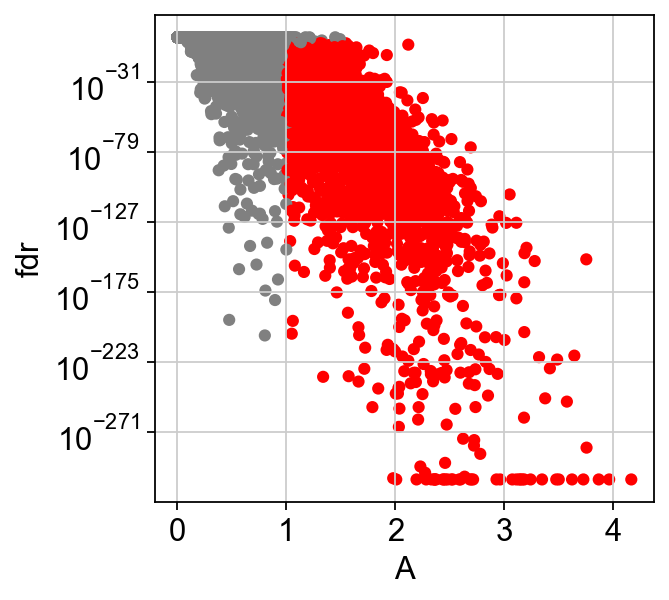

In [16]:
scf.pl.test_association(adata)

In [17]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 3962/3962 [00:18<00:00, 209.90it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:20) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [18]:
adata.write("adata_tree.h5ad")